In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preparation

In [2]:
df = pd.read_csv("dataset_new_version.csv")

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
Predicted_df = df.query("IsPrediction==1")
Actual_df = df.query("IsPrediction==0")

In [5]:
df.columns[df.columns.to_series().apply(lambda x:True if "Predict" in x else False)]

Index(['IsPrediction', 'PredictedCount'], dtype='object')

In [6]:
df.columns[df.columns.to_series().apply(lambda x:True if "Expected" in x else False)]

Index(['ExpectedWagonNuber', 'ExpectedOccupancyPercents', 'ExpectedOccupancy', 'ExpectedCapacity'], dtype='object')

In [7]:
df.columns[df.columns.to_series().apply(lambda x:True if "Suggested" in x else False)]

Index(['SuggestedCapacity', 'SuggestedOccupancyPercents', 'SuggestedOccupancy', 'SuggestedWagonNuber'], dtype='object')

In [8]:
df.columns

Index(['DepartureDate', 'StationName', 'IndexNumber', 'Count', 'TicketsSold', 'Capacity', 'CarClass', 'TrainNumber', 'Occupancy', 'OccupancyPercents', 'WagonNumber', 'TrainRoute', 'NumberOfStations', 'IsBad', 'IsPrediction', 'SuggestedCapacity', 'ExpectedWagonNuber', 'SuggestedOccupancyPercents', 'ExpectedOccupancyPercents', 'SuggestedOccupancy', 'SuggestedWagonNuber', 'ExpectedOccupancy', 'ExpectedCapacity', 'IsValidation', 'ValidatedCount', 'PredictedCount'], dtype='object')

In [9]:
###??  'WagonNumber', 'OccupancyPercents', 'Occupancy', 'Capacity'  ?? ###

#  Target: TicketsSold
#

In [10]:
df.DepartureDate = pd.to_datetime(df.DepartureDate)

In [11]:
df['Year'] = pd.DatetimeIndex(df['DepartureDate']).year
df['Month'] = pd.DatetimeIndex(df['DepartureDate']).month
df['Day'] = pd.DatetimeIndex(df['DepartureDate']).day

In [12]:
df['Day_Name'] = df['DepartureDate'].dt.day_name()

In [13]:
trains_nums = ["021Ц", "033Ц", "034Т", "003Ц", "009Т"]

In [14]:
df = df[df.TrainNumber.isin(trains_nums)]

In [15]:
import datetime

In [16]:
Predicted_df = df.query("IsPrediction==1").drop(["Occupancy", 'TicketsSold','Capacity', 'Count', 'WagonNumber', 'IsValidation', 'ValidatedCount','OccupancyPercents','IsPrediction', 'SuggestedCapacity', 'SuggestedOccupancyPercents', 'SuggestedOccupancy', 'SuggestedWagonNuber'],axis=1)

In [17]:
Actual_df = df.query("IsPrediction==0").drop(['SuggestedCapacity', 'ExpectedWagonNuber', 'SuggestedOccupancyPercents', 'ExpectedOccupancyPercents', 'SuggestedOccupancy', 'SuggestedWagonNuber', 'ExpectedOccupancy', 'ExpectedCapacity', 'IsValidation', 'ValidatedCount', 'PredictedCount','IsPrediction'], axis=1)

In [18]:
Predicted_df.columns = [x.replace("Expected", "").replace("Suggested", "").replace("Predicted", "") if "Expected" in x or "Suggested" in x or "Predicted" in x else x for x in Predicted_df.columns]

In [19]:
Predicted_df.columns.sort_values()

Index(['Capacity', 'CarClass', 'Count', 'Day', 'Day_Name', 'DepartureDate', 'IndexNumber', 'IsBad', 'Month', 'NumberOfStations', 'Occupancy', 'OccupancyPercents', 'StationName', 'TrainNumber', 'TrainRoute', 'WagonNuber', 'Year'], dtype='object')

In [20]:
Actual_df.columns.sort_values()

Index(['Capacity', 'CarClass', 'Count', 'Day', 'Day_Name', 'DepartureDate', 'IndexNumber', 'IsBad', 'Month', 'NumberOfStations', 'Occupancy', 'OccupancyPercents', 'StationName', 'TicketsSold', 'TrainNumber', 'TrainRoute', 'WagonNumber', 'Year'], dtype='object')

In [21]:
Predicted_df['TicketsSold'] = Predicted_df['Capacity']-Predicted_df['Count']

In [22]:
Predicted_df = Predicted_df.rename(columns={"WagonNuber":"WagonNumber"})

In [23]:
Predicted_df  =  Predicted_df[Actual_df.columns]

In [24]:
Actual_df.IsBad.value_counts()
#all data is not anomalous

0    385699
Name: IsBad, dtype: int64

In [25]:
#Which columns contains NaN???

for x in Predicted_df:
    print(x, Actual_df[x].isna().sum())
    
#TicketsSold 789877
#Capacity 789877
#Occupancy 789877
#OccupancyPercents 789877
#WagonNumber 789877

DepartureDate 0
StationName 0
IndexNumber 0
Count 0
TicketsSold 94727
Capacity 94727
CarClass 0
TrainNumber 0
Occupancy 94727
OccupancyPercents 94727
WagonNumber 94727
TrainRoute 0
NumberOfStations 0
IsBad 0
Year 0
Month 0
Day 0
Day_Name 0


In [26]:
Actual_df = Actual_df.dropna()

In [27]:
Predicted_df[["Count", "TicketsSold", "Capacity", "WagonNumber", "NumberOfStations", "Year", "IndexNumber"]] = Predicted_df[["Count", "TicketsSold", "Capacity", "WagonNumber", "NumberOfStations", "Year", "IndexNumber"]].astype(int)

In [28]:
Actual_df[["Count", "TicketsSold", "Capacity", "WagonNumber", "NumberOfStations", "Year","IndexNumber"]] = Actual_df[["Count", "TicketsSold", "Capacity", "WagonNumber", "NumberOfStations", "Year","IndexNumber"]].astype(int)

In [29]:
Actual_df = Actual_df.append(Predicted_df)

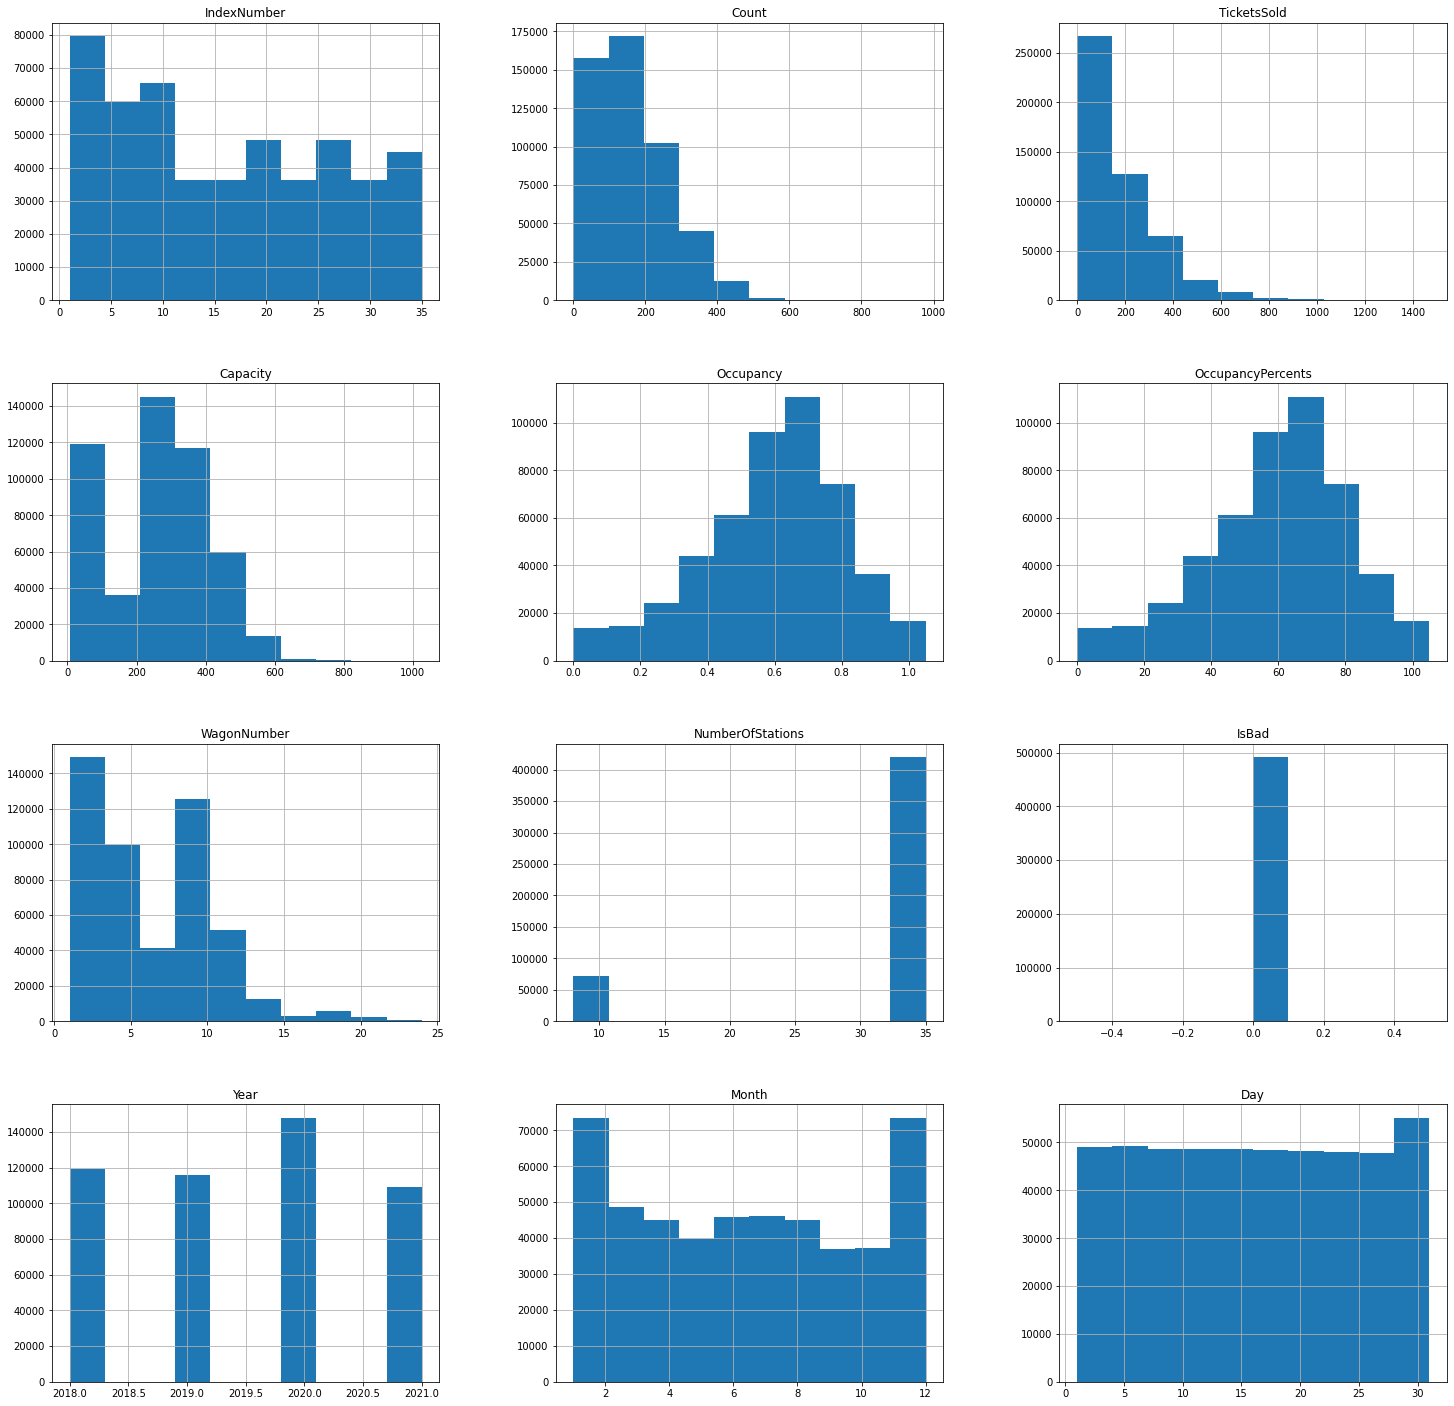

In [30]:
a = Actual_df.drop("DepartureDate",axis=1).hist(figsize=(25,25))

In [31]:
Occupancy_by_year = Actual_df.groupby(["Year", "Month"]).aggregate({"Occupancy":"mean"}).reset_index()

In [32]:
act = Actual_df.groupby(["Year", "Month", "Day"]).Occupancy.mean().reset_index()

In [33]:
Actual_df.TrainNumber.unique()

array(['003Ц', '009Т', '021Ц', '033Ц', '034Т'], dtype=object)

In [34]:
Actual_df.query("TrainNumber == '003Ц'")[['Occupancy','DepartureDate']].set_index("DepartureDate")

,Occupancy
DepartureDate,
2019-02-02,0.413580
2019-02-02,0.478395
2019-02-02,0.456140
2019-02-02,0.500000
2019-02-02,0.511696
...,...
2021-12-31,0.555556
2021-12-31,0.583333
2021-12-31,0.583333


In [35]:
Actual_df[Actual_df.TrainNumber == "003Ц"][['Occupancy','DepartureDate','WagonNumber']]

,Occupancy,DepartureDate,WagonNumber
13233,0.413580,2019-02-02,18
13234,0.478395,2019-02-02,18
13235,0.456140,2019-02-02,19
13236,0.500000,2019-02-02,19
13237,0.511696,2019-02-02,19
...,...,...,...
2261023,0.555556,2021-12-31,3
2261024,0.583333,2021-12-31,3
2261025,0.583333,2021-12-31,3
2261026,0.472222,2021-12-31,3


In [36]:
','.join(list(Actual_df.columns))

'DepartureDate,StationName,IndexNumber,Count,TicketsSold,Capacity,CarClass,TrainNumber,Occupancy,OccupancyPercents,WagonNumber,TrainRoute,NumberOfStations,IsBad,Year,Month,Day,Day_Name'

In [37]:
from matplotlib.pyplot import cm

def plot_avg_by_train(df):
    '''
    This function plots avarage occupancy of each train
    df must contain at least 'Occupancy','DepartureDate' columns
    '''
    fig, ax = plt.subplots(5,1, figsize = (15,15))
    color = iter(cm.cool(np.linspace(0, 1, len(df.TrainNumber.unique()))))

    for ind, train in enumerate( Actual_df.TrainNumber.unique() ):
        temp_df = df[Actual_df.TrainNumber == train][['Occupancy','DepartureDate']]

        sns.lineplot(x= "DepartureDate", 
                     y= "Occupancy",
                    data = df[df.TrainNumber == train][['Occupancy','DepartureDate']].groupby("DepartureDate").aggregate({"Occupancy":"mean"}).reset_index(),
                    ax= ax[ind],
                    color=next(color)
                        ).set_title("train: "+train)

    fig.suptitle("Avarage Wagon's Occupancy of each Train",fontsize=16)
    fig.tight_layout() 


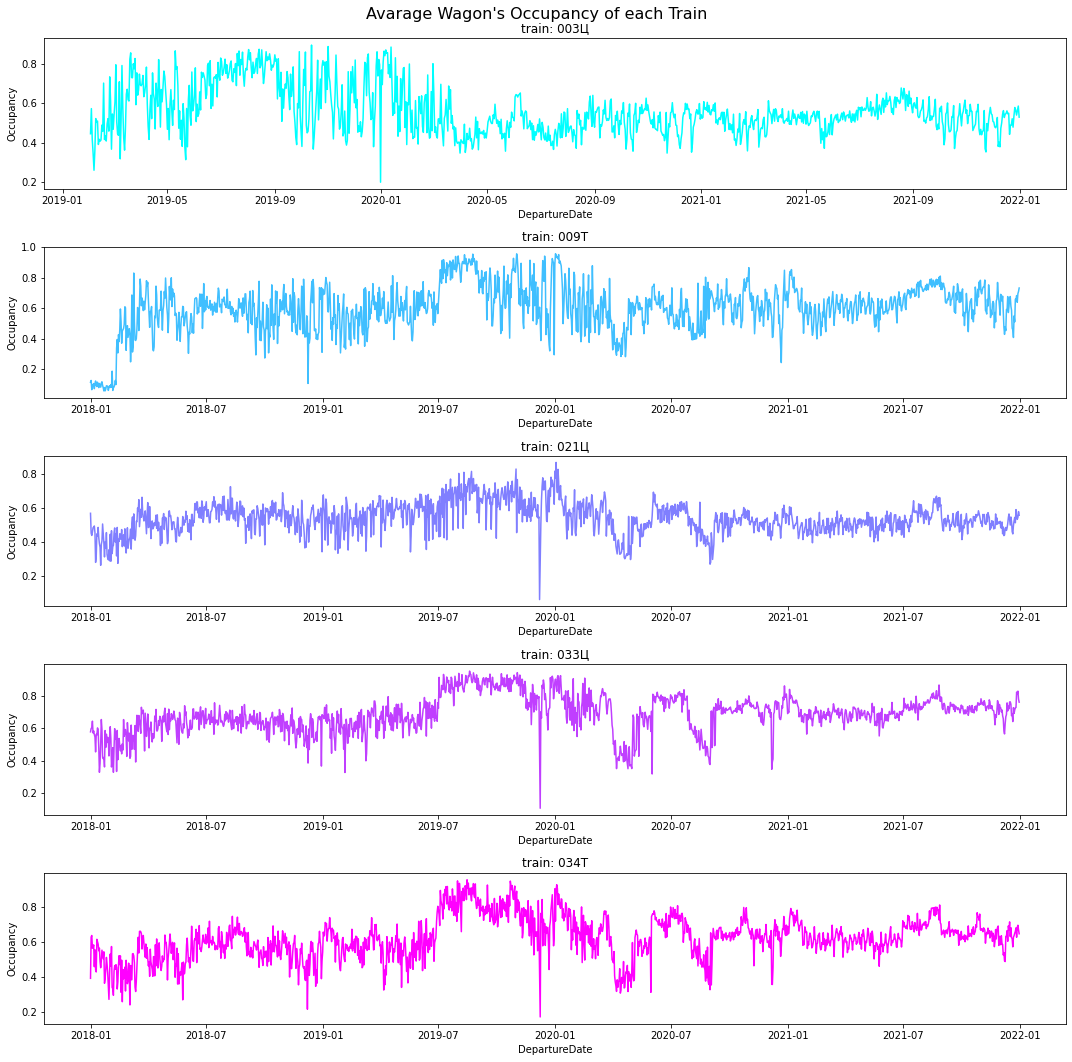

In [38]:
plot_avg_by_train(Actual_df)

In [39]:
def plot_by_wagon(df, train):
    '''
    This function plots 
    '''
    df = df[df.TrainNumber == train]
    df = df.sort_values("WagonNumber")
    df = df[['DepartureDate', 'WagonNumber', 'Occupancy']]

    fig, ax = plt.subplots(len(df.WagonNumber.unique()), 1, figsize = (10,50))
    color = iter(cm.cool(np.linspace(0, 1, len(df.WagonNumber.unique()))))

    for ind, wagon in enumerate(df.WagonNumber.unique() ):
        sns.lineplot(x= "DepartureDate", 
                     y= "Occupancy",
                    data = df[df.WagonNumber == wagon][['Occupancy','DepartureDate']]\
                     .groupby("DepartureDate").aggregate({"Occupancy":"mean"}).reset_index(),
                    ax= ax[ind],
                    color=next(color)
                        ).set_title("wagon: "+str(wagon))

    fig.suptitle(f"Train: {train}", y = 1, fontsize=24)


    fig.tight_layout() 

In [40]:
def between_dates(df, start_date, end_date):
    return df.loc[(df['DepartureDate'] > start_date) & (df['DepartureDate'] <= end_date)]

In [41]:
from matplotlib.ticker import LinearLocator
def plot_between_dates(df, train, start_date, end_date):
    df = between_dates(df, start_date, end_date).set_index(["DepartureDate","IndexNumber"]).reset_index()
    df = df[df.TrainNumber==train]
    df['DateIndex'] = df.DepartureDate.astype(str)+" "+df.IndexNumber.astype(str)
    
    fig = plt.figure(figsize=(25,10))
    ax = fig.add_subplot(111)
    
    s = sns.lineplot(x="DateIndex", y="Occupancy",  data= df, ax=ax).set_title("Occupancy of train("+train+") between "+start_date+"and"+end_date)
    ticks = plt.xticks(rotation=90)
    
    ax.xaxis.set_major_locator(LinearLocator(numticks=30))

    plt.show()

In [42]:
def plot_between_dates_train(df, start_date, end_date):
    df = between_dates(df, start_date, end_date).set_index(["DepartureDate","IndexNumber"]).reset_index()
    df['DateIndex'] = df.DepartureDate.astype(str)+" "+df.IndexNumber.astype(str)
    
    fig = plt.figure(figsize=(25,10))
    ax = fig.add_subplot(111)
    
    s = sns.lineplot(x="DateIndex", y="Occupancy",  data= df, ax=ax).set_title("Occupancy of train("+train+") between "+start_date+"and"+end_date)
    ticks = plt.xticks(rotation=90)
    
    ax.xaxis.set_major_locator(LinearLocator(numticks=30))

    plt.show()

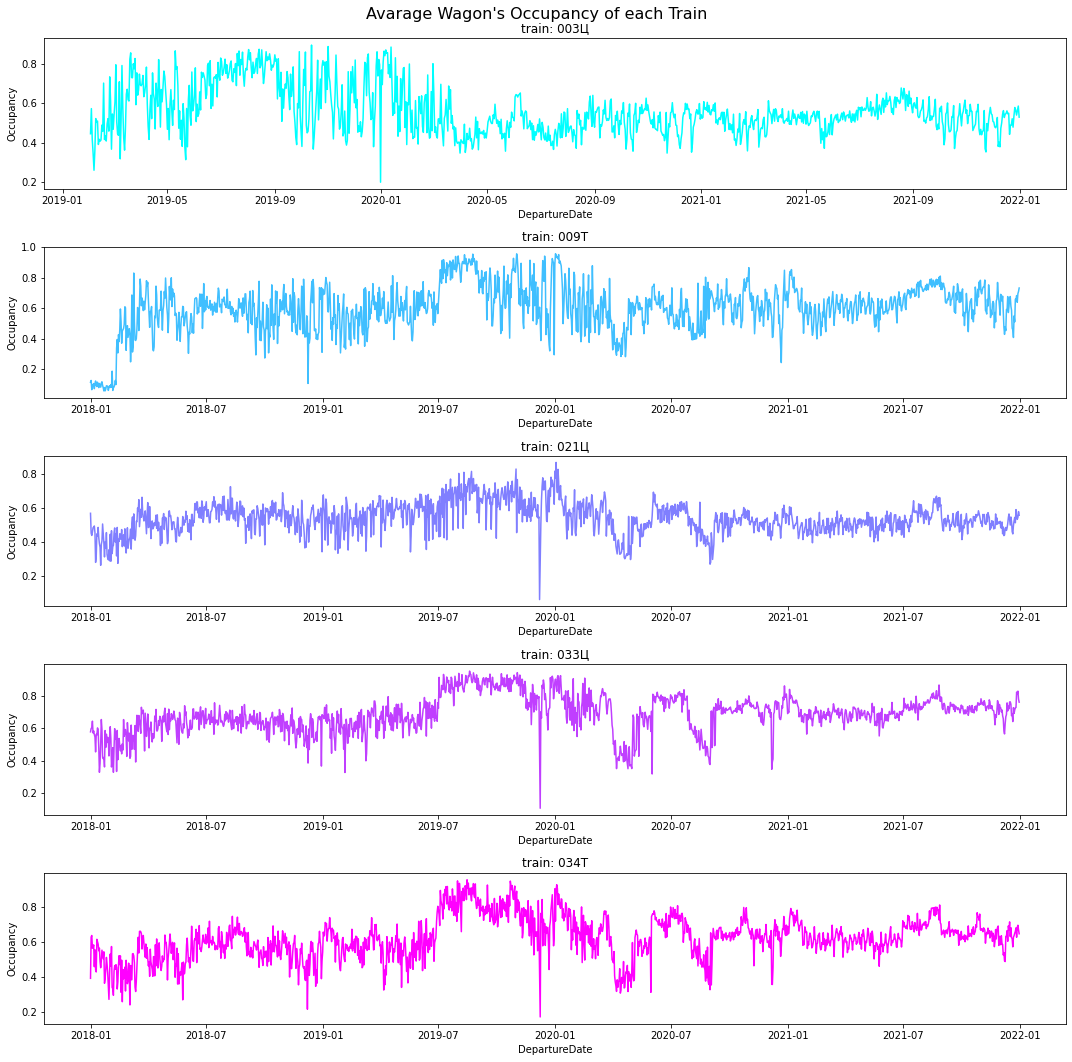

In [43]:
plot_avg_by_train(Actual_df)

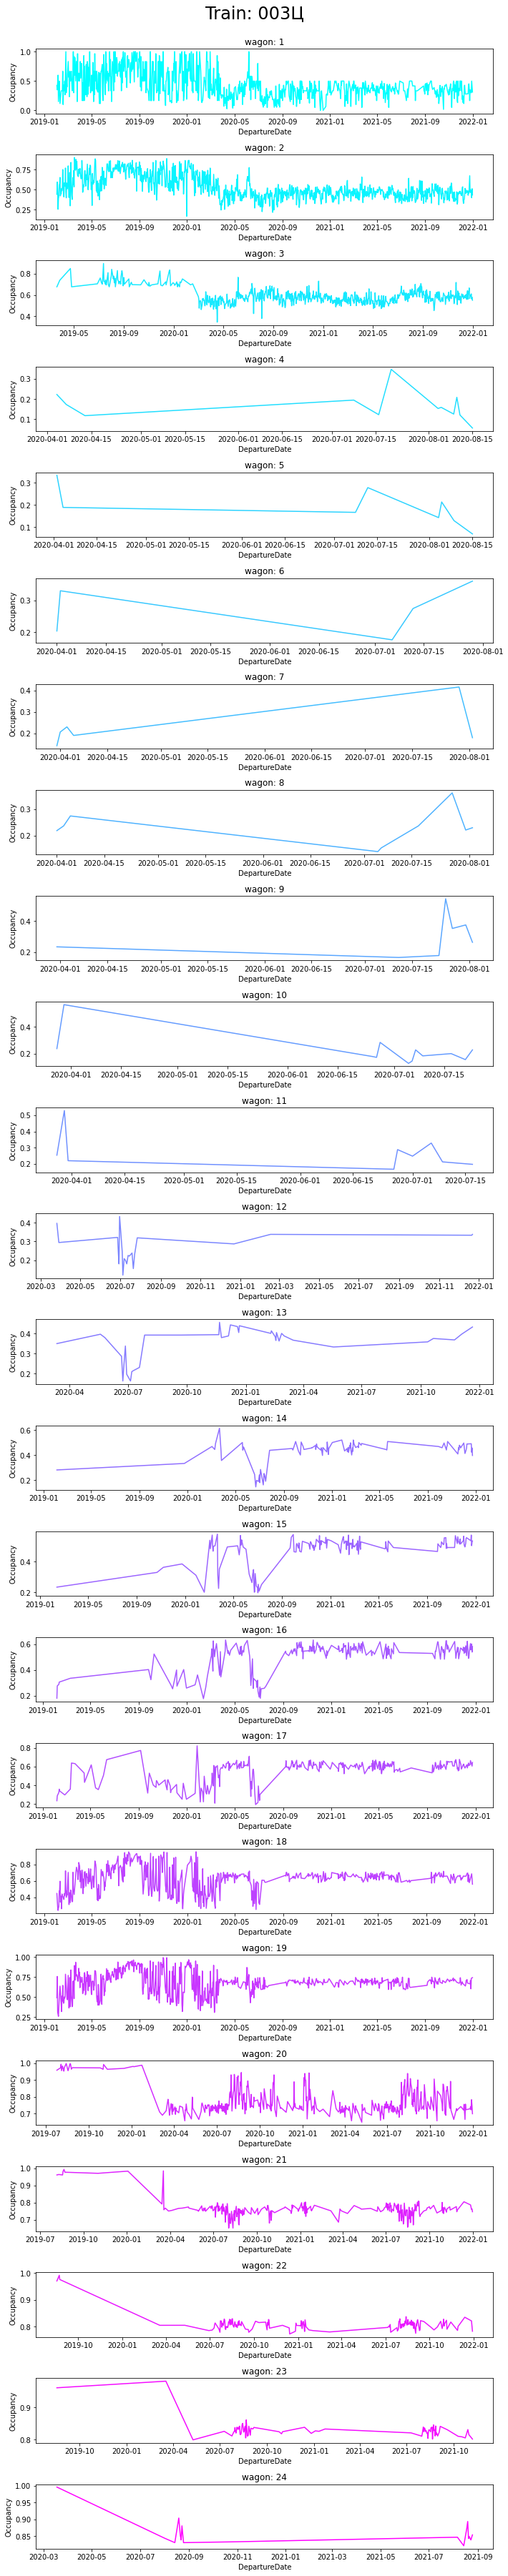

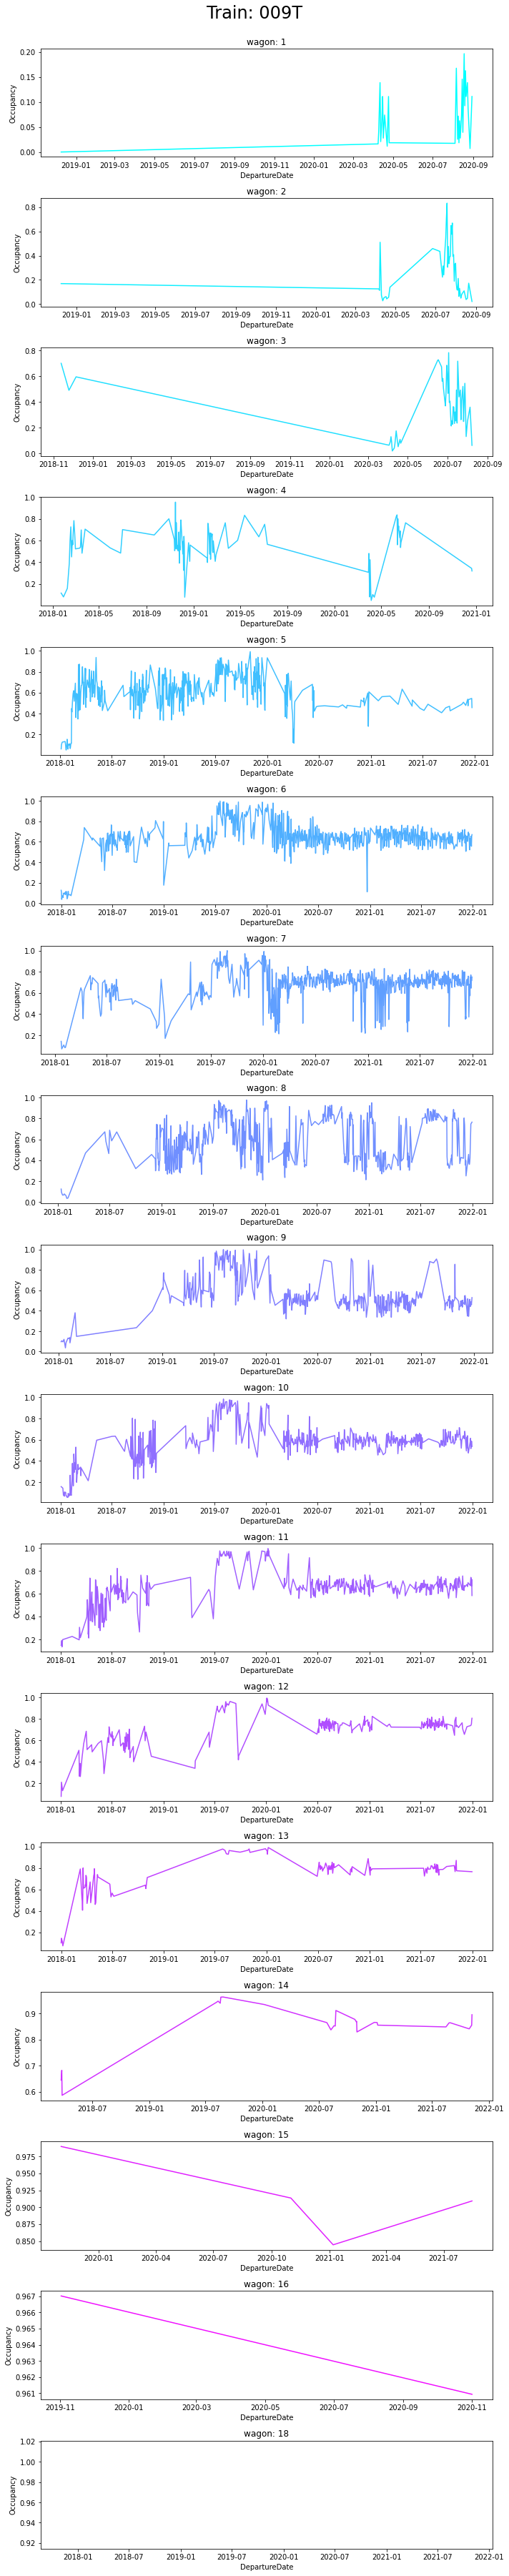

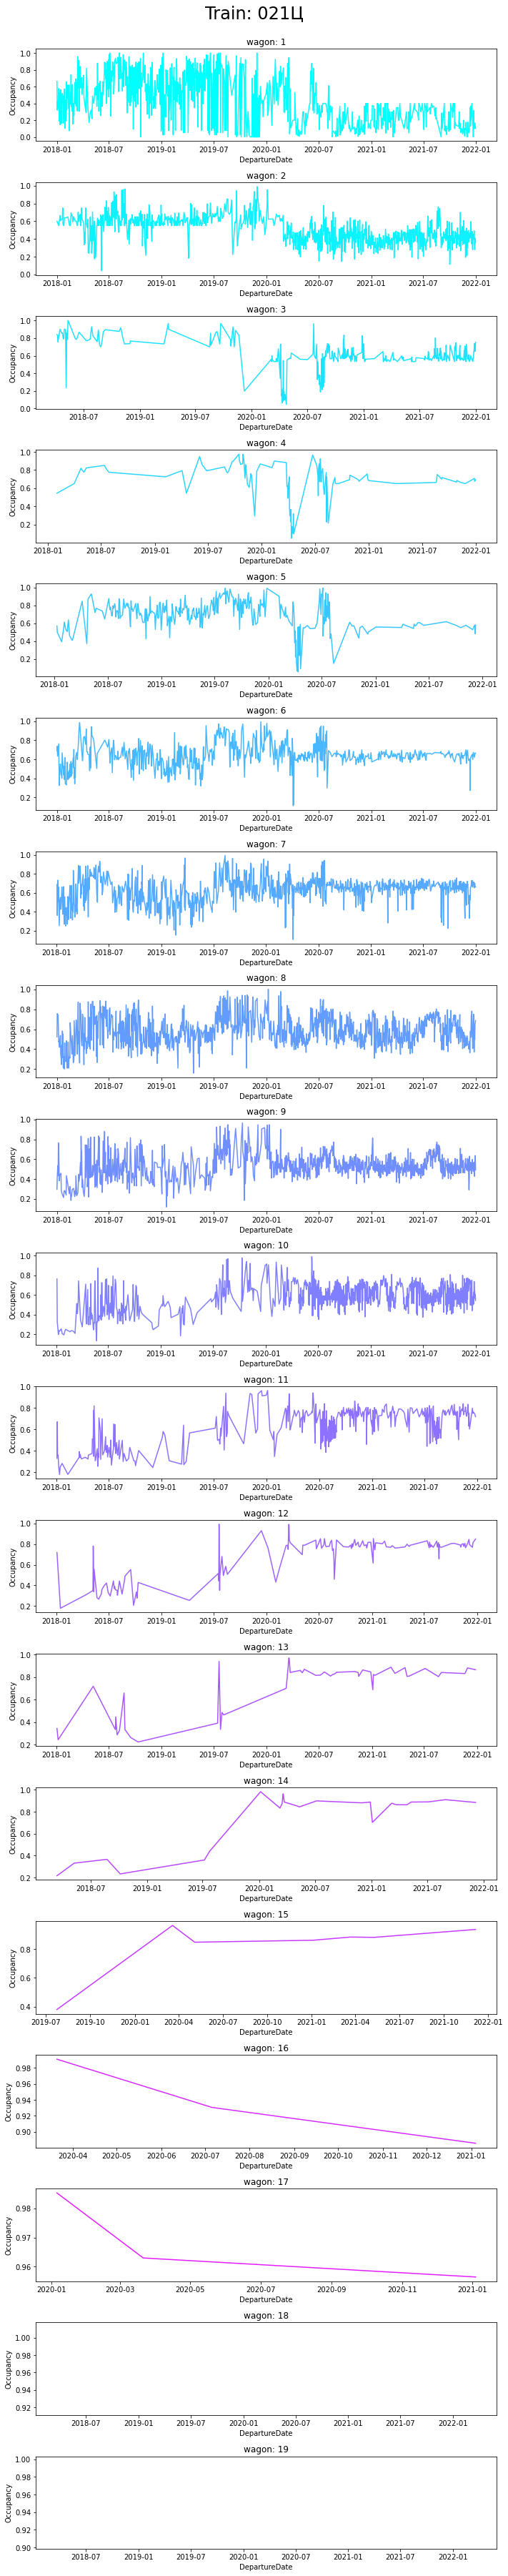

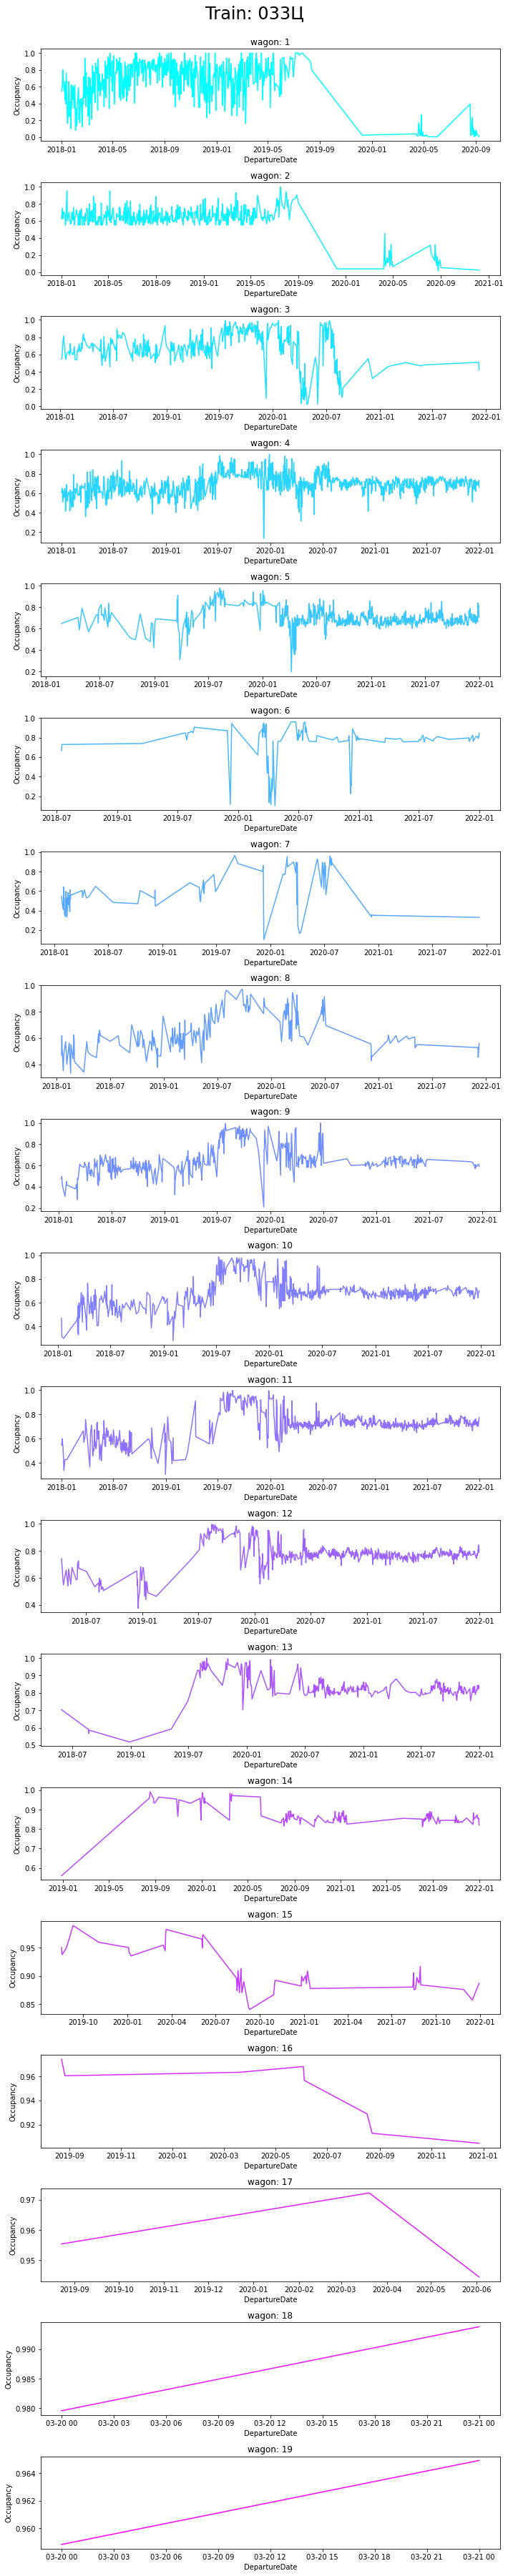

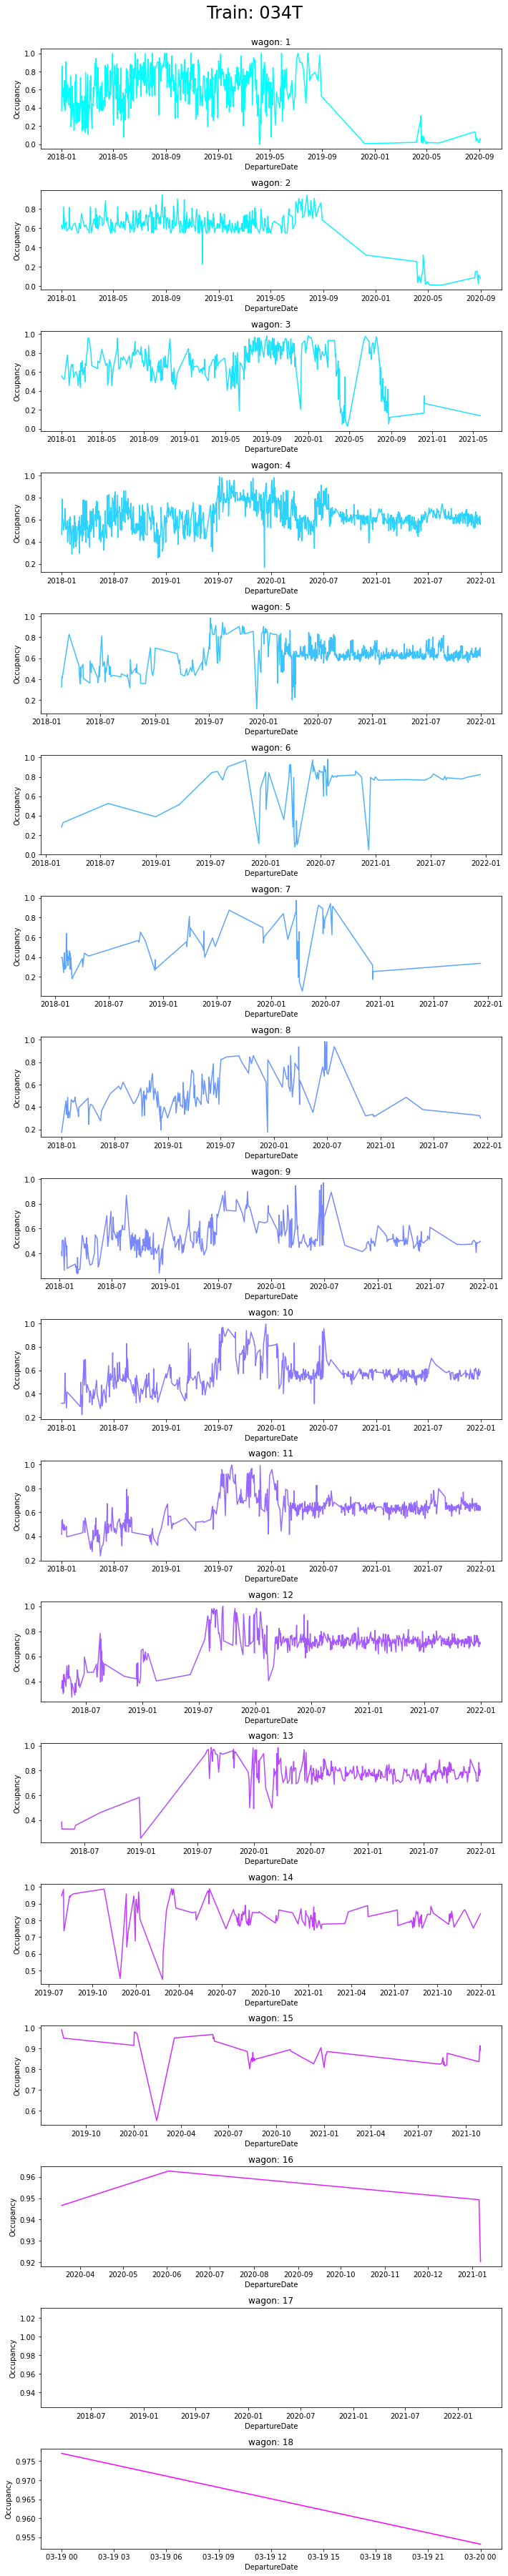

In [44]:
for x in Actual_df.TrainNumber.unique():
    plot_by_wagon(Actual_df, x)

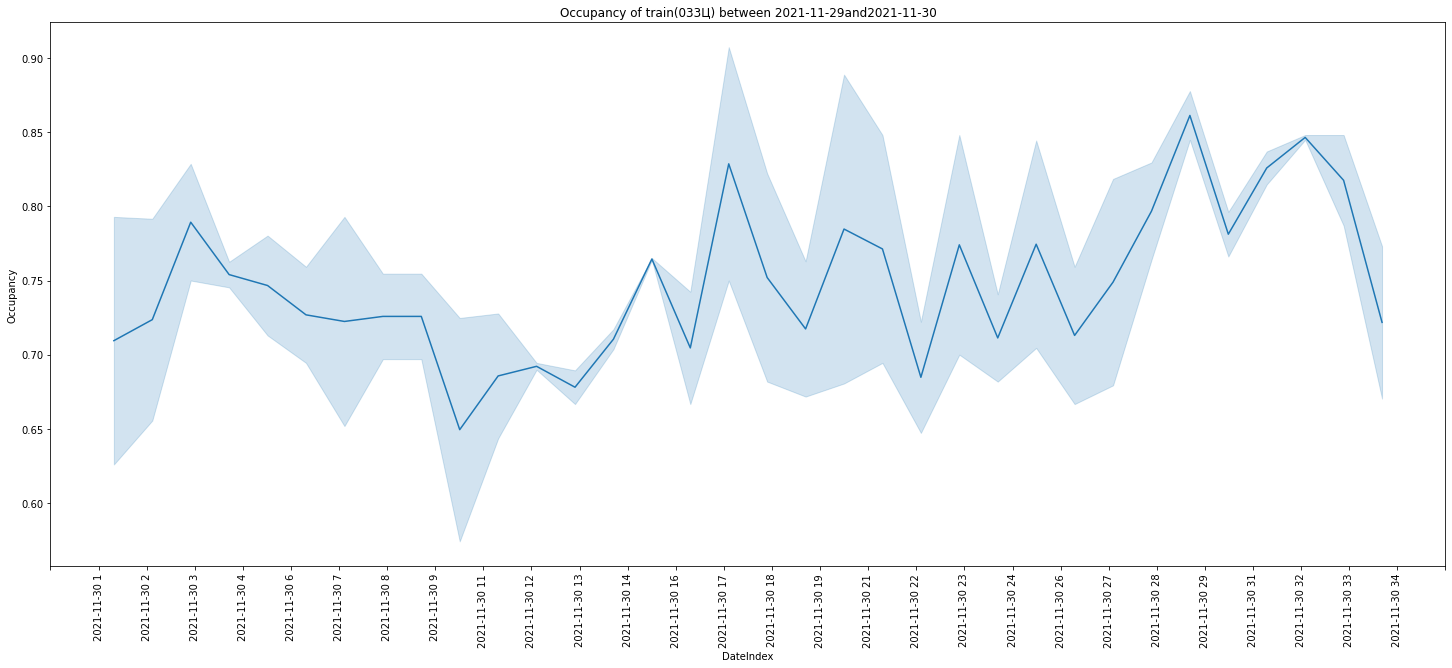

In [45]:
plot_between_dates(Actual_df, "033Ц", "2021-11-29","2021-11-30")

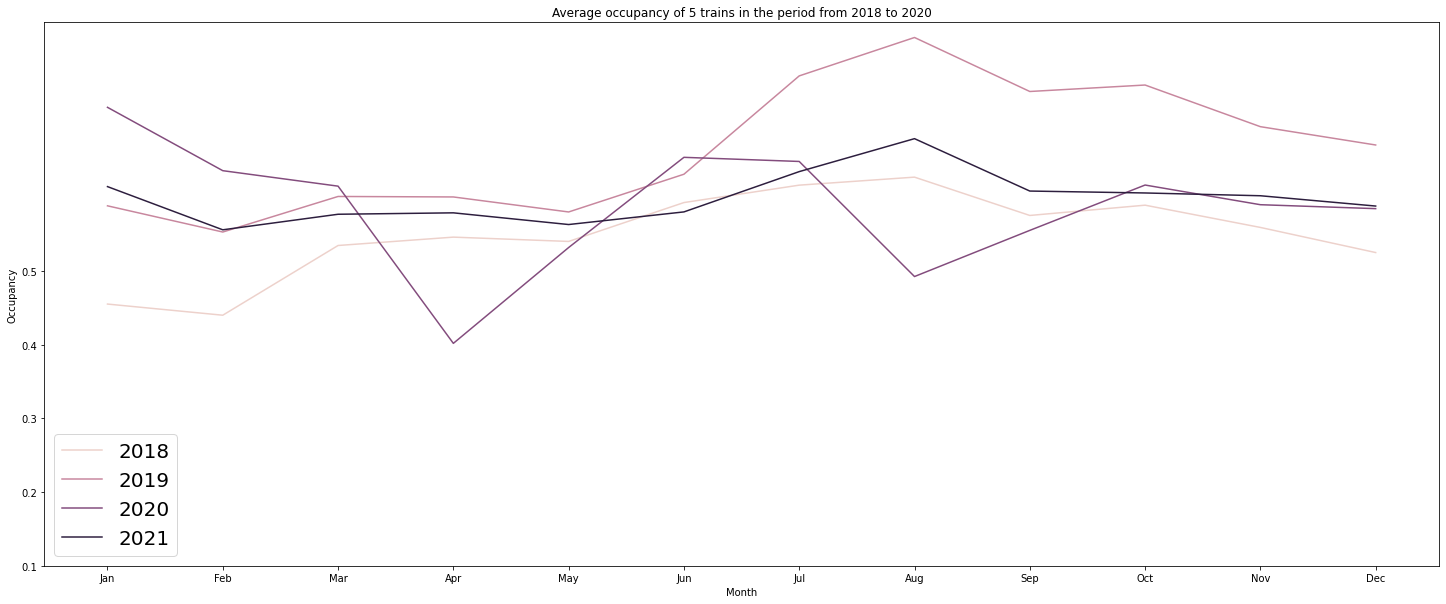

In [46]:
plt.figure(figsize=(25,10))
sns.set_context(font_scale=2)                                                  

g = sns.lineplot(x=Occupancy_by_year.Month, y = Occupancy_by_year.Occupancy, data=Occupancy_by_year, hue='Year')

month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec'] 


g.legend(fontsize=20)
g.set_xticks(range(1,13))
g.set_title("Average occupancy of 5 trains in the period from 2018 to 2020")

g.set_yticks([0.1, 0.2,0.3,0.4,0.5])


ticks = g.set_xticklabels(month_names)

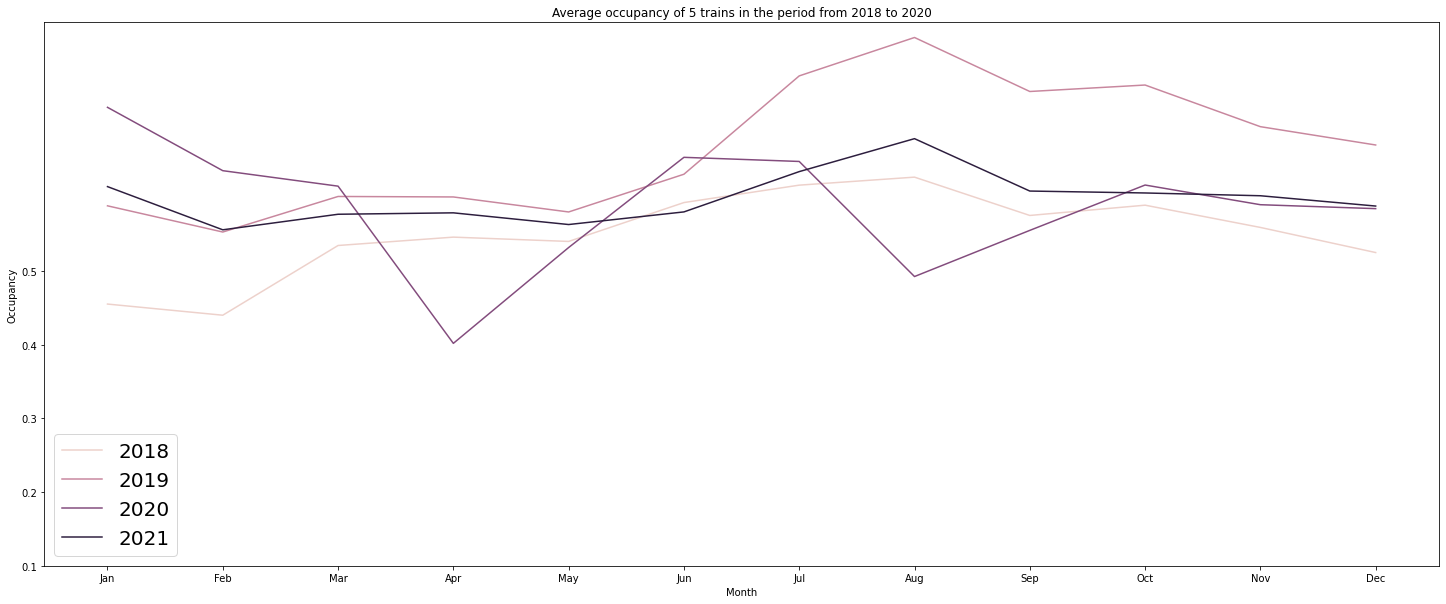

In [47]:
plt.figure(figsize=(25,10))
sns.set_context(font_scale=2)                                                  

g = sns.lineplot(x=Occupancy_by_year.Month, y = Occupancy_by_year.Occupancy, data=Occupancy_by_year, hue='Year')
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec'] 
g.legend(fontsize=20)
g.set_xticks(range(1,13))
g.set_title("Average occupancy of 5 trains in the period from 2018 to 2020")

g.set_yticks([0.1, 0.2,0.3,0.4,0.5])


ticks = g.set_xticklabels(month_names)

In [48]:
import datetime 

In [49]:
Actual_df = Actual_df.drop(['IsBad'],axis=1)
Predicted_df = Predicted_df.drop(['IsBad'],axis=1)

In [50]:
#Add day name  ????                                                                               
#WagonNumber better to keep as float or make One Hot encode?    

In [51]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(categories=cats, ordered=True)
Actual_df['Day_Name'] = Actual_df['Day_Name'].astype(cat_type)

In [52]:
Occupancy_by_day = Actual_df.groupby(["TrainNumber", "Day_Name"])["TicketsSold", "Occupancy"].mean().reset_index()

<ipython-input-52-dc6093fe11bf>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Occupancy_by_day = Actual_df.groupby(["TrainNumber", "Day_Name"])["TicketsSold", "Occupancy"].mean().reset_index()


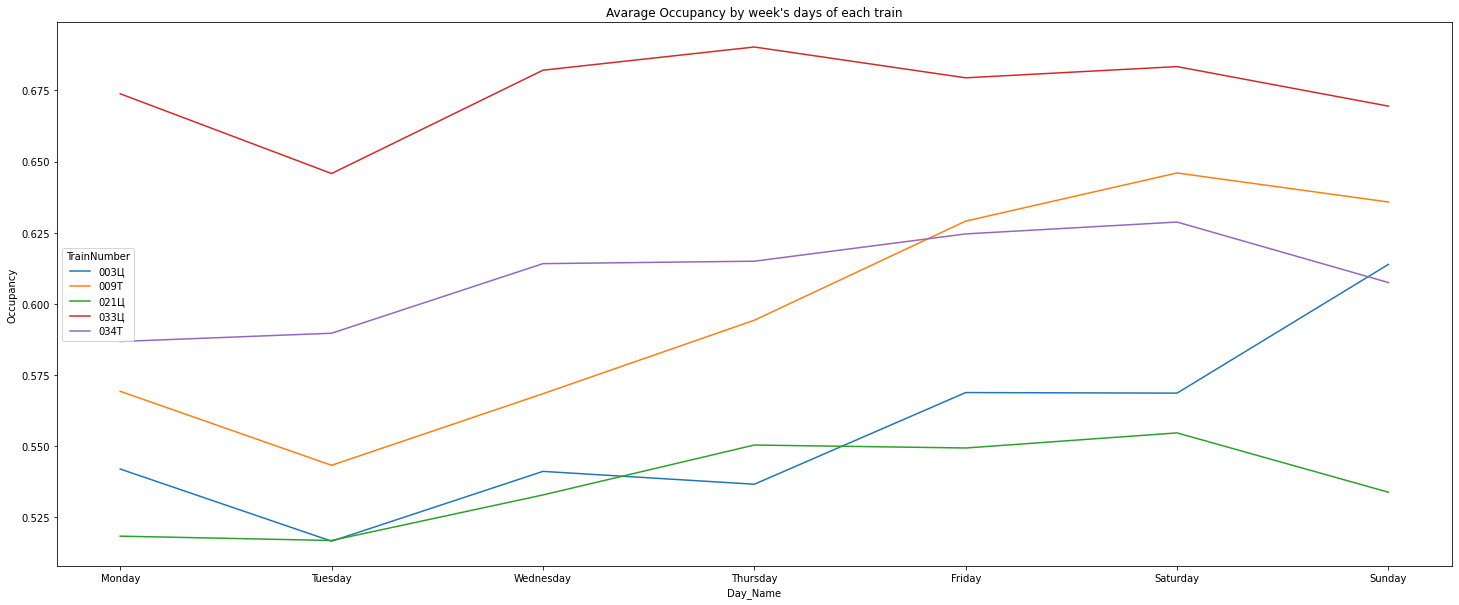

In [53]:
plt.figure(figsize=(25,10))

g3 = sns.lineplot(x=Occupancy_by_day.Day_Name, y = Occupancy_by_day.Occupancy, data=Occupancy_by_day, hue='TrainNumber')
g3.set_title("Avarage Occupancy by week's days of each train")
ticks2 = g.set_xticklabels(month_names)

In [54]:
OccupancyByWagonNumber = Actual_df.groupby(["WagonNumber", "TrainNumber"]).aggregate({"Occupancy":"mean"}).reset_index()


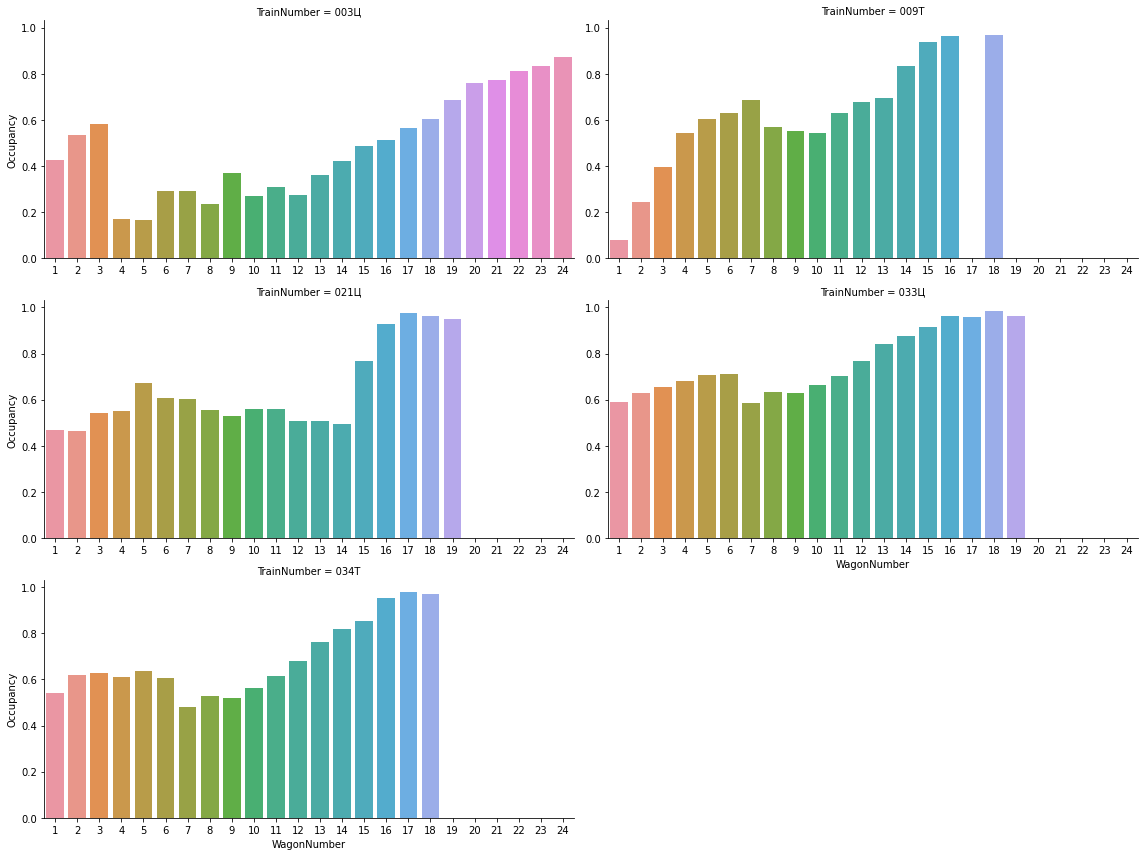

In [55]:
grid = sns.catplot(x="WagonNumber", y="Occupancy",
                col="TrainNumber",
                data=OccupancyByWagonNumber, kind="bar",col_wrap=2,height = 4, aspect= 2,
            ci=None,legend=True)
for ax in grid.axes.flatten():
    ax.tick_params(labelbottom=True)
    ax.tick_params(labelleft=True)

grid.fig.tight_layout() 
#What waggons are more full?

In [56]:
CarClassCount = Actual_df.groupby(["TrainNumber", "CarClass"]).aggregate({"Occupancy":"mean"}).reset_index()

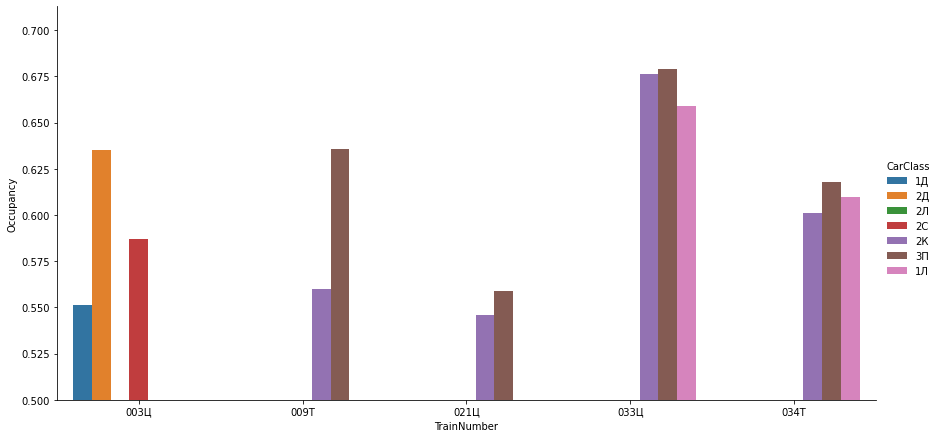

In [57]:
g = sns.catplot(
    data=CarClassCount, kind="bar",
    x="TrainNumber", y="Occupancy", hue="CarClass",
      height=6, aspect=2
)
g.set(ylim=(0.5, None))
#What car classes  are more crowded?

In [58]:
OccupancyByDay = Actual_df.groupby(["TrainNumber","Day"]).aggregate({"Occupancy":"mean"}).reset_index()

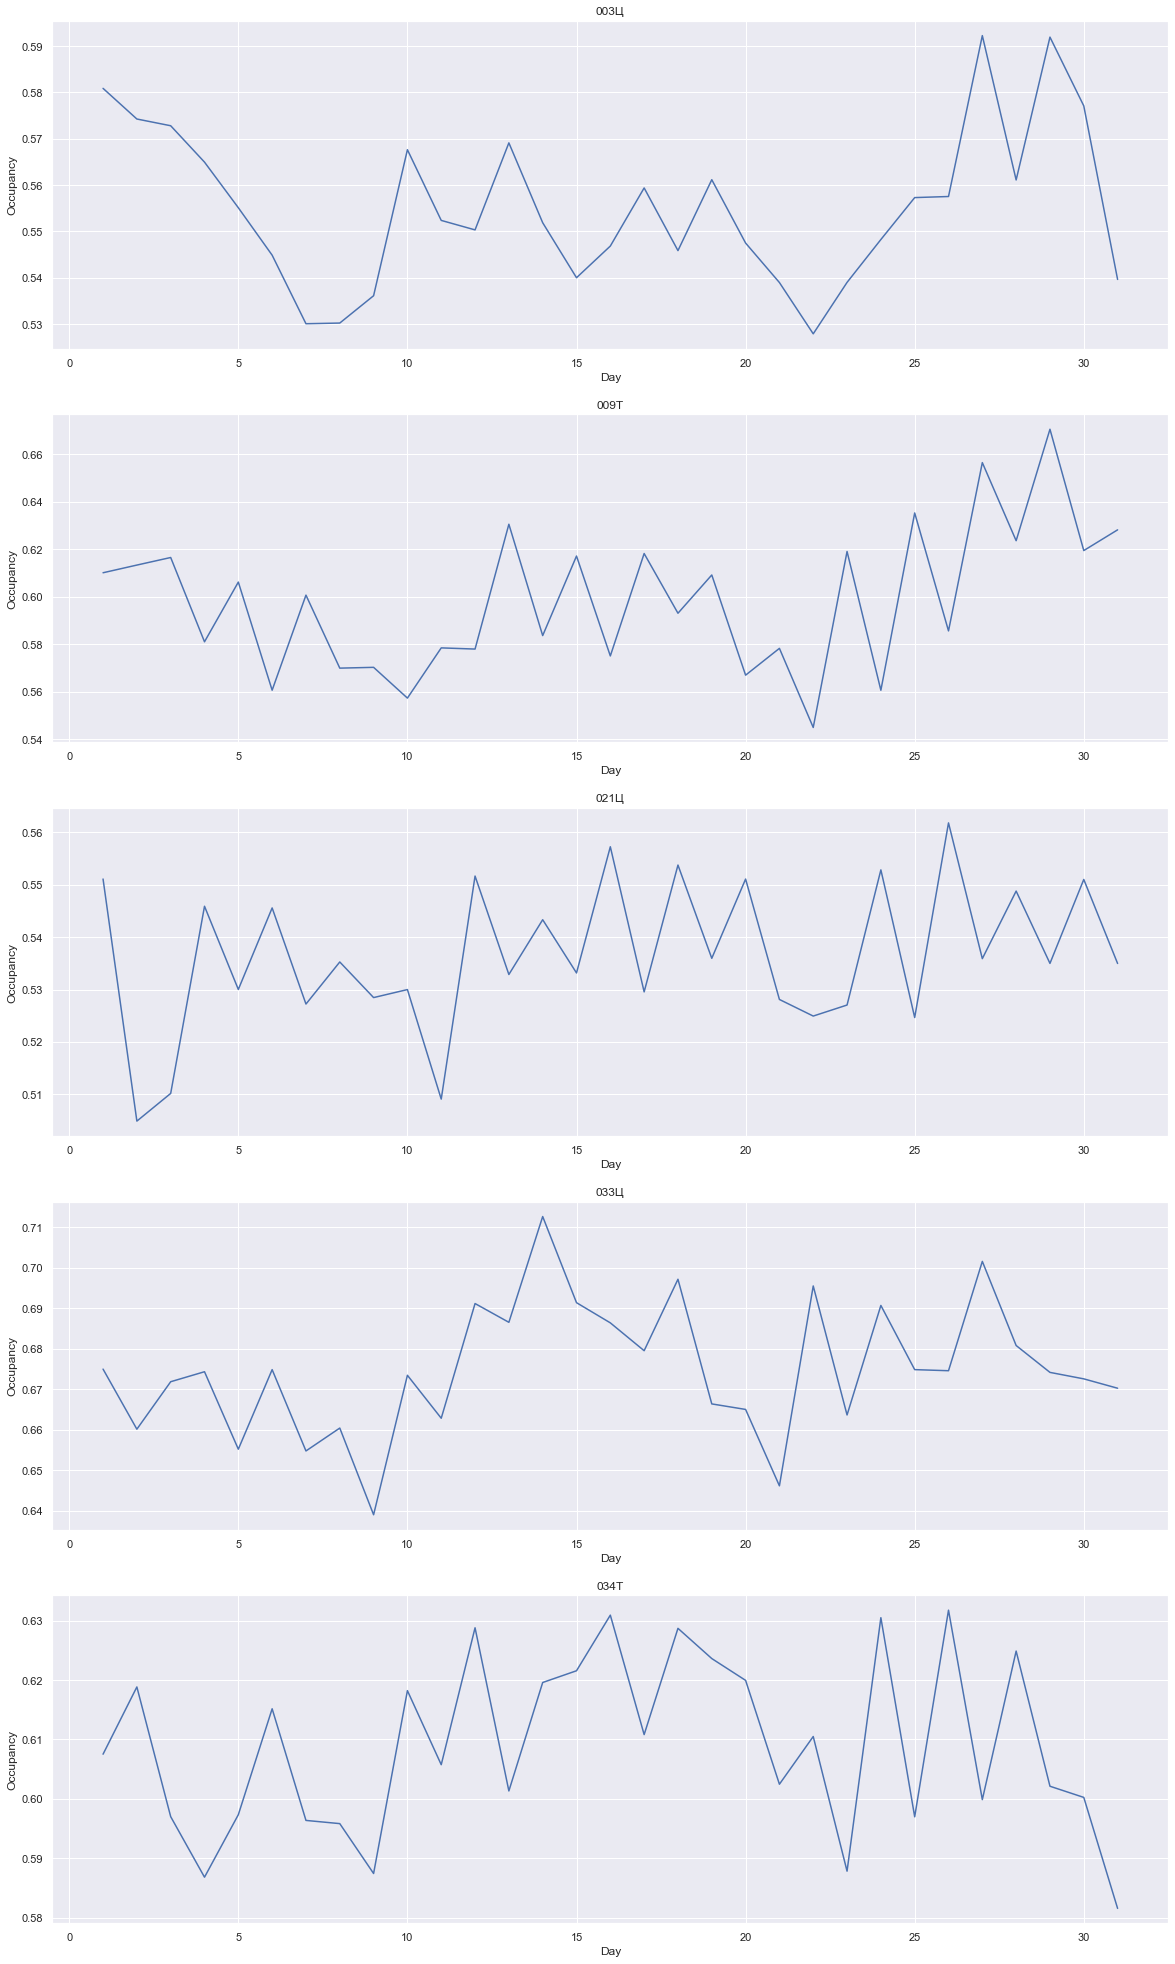

In [59]:
sns.set(style='darkgrid',)
fig, axes = plt.subplots(5, 1, figsize=(20,35))

for ax, train in enumerate(OccupancyByDay.TrainNumber.unique()):
    g = sns.lineplot(x=OccupancyByDay.Day, y=OccupancyByDay[OccupancyByDay.TrainNumber == train].Occupancy, dashes = False, 
                 ax=axes[ax]).set_title(train)
    
#How does the occupancy rate of a train change by days of the month?

In [60]:
OccupancyByIndex = Actual_df.groupby(["IndexNumber","TrainNumber"]).aggregate({"Occupancy":"mean"}).reset_index()

003Ц
009Т
021Ц
033Ц
034Т


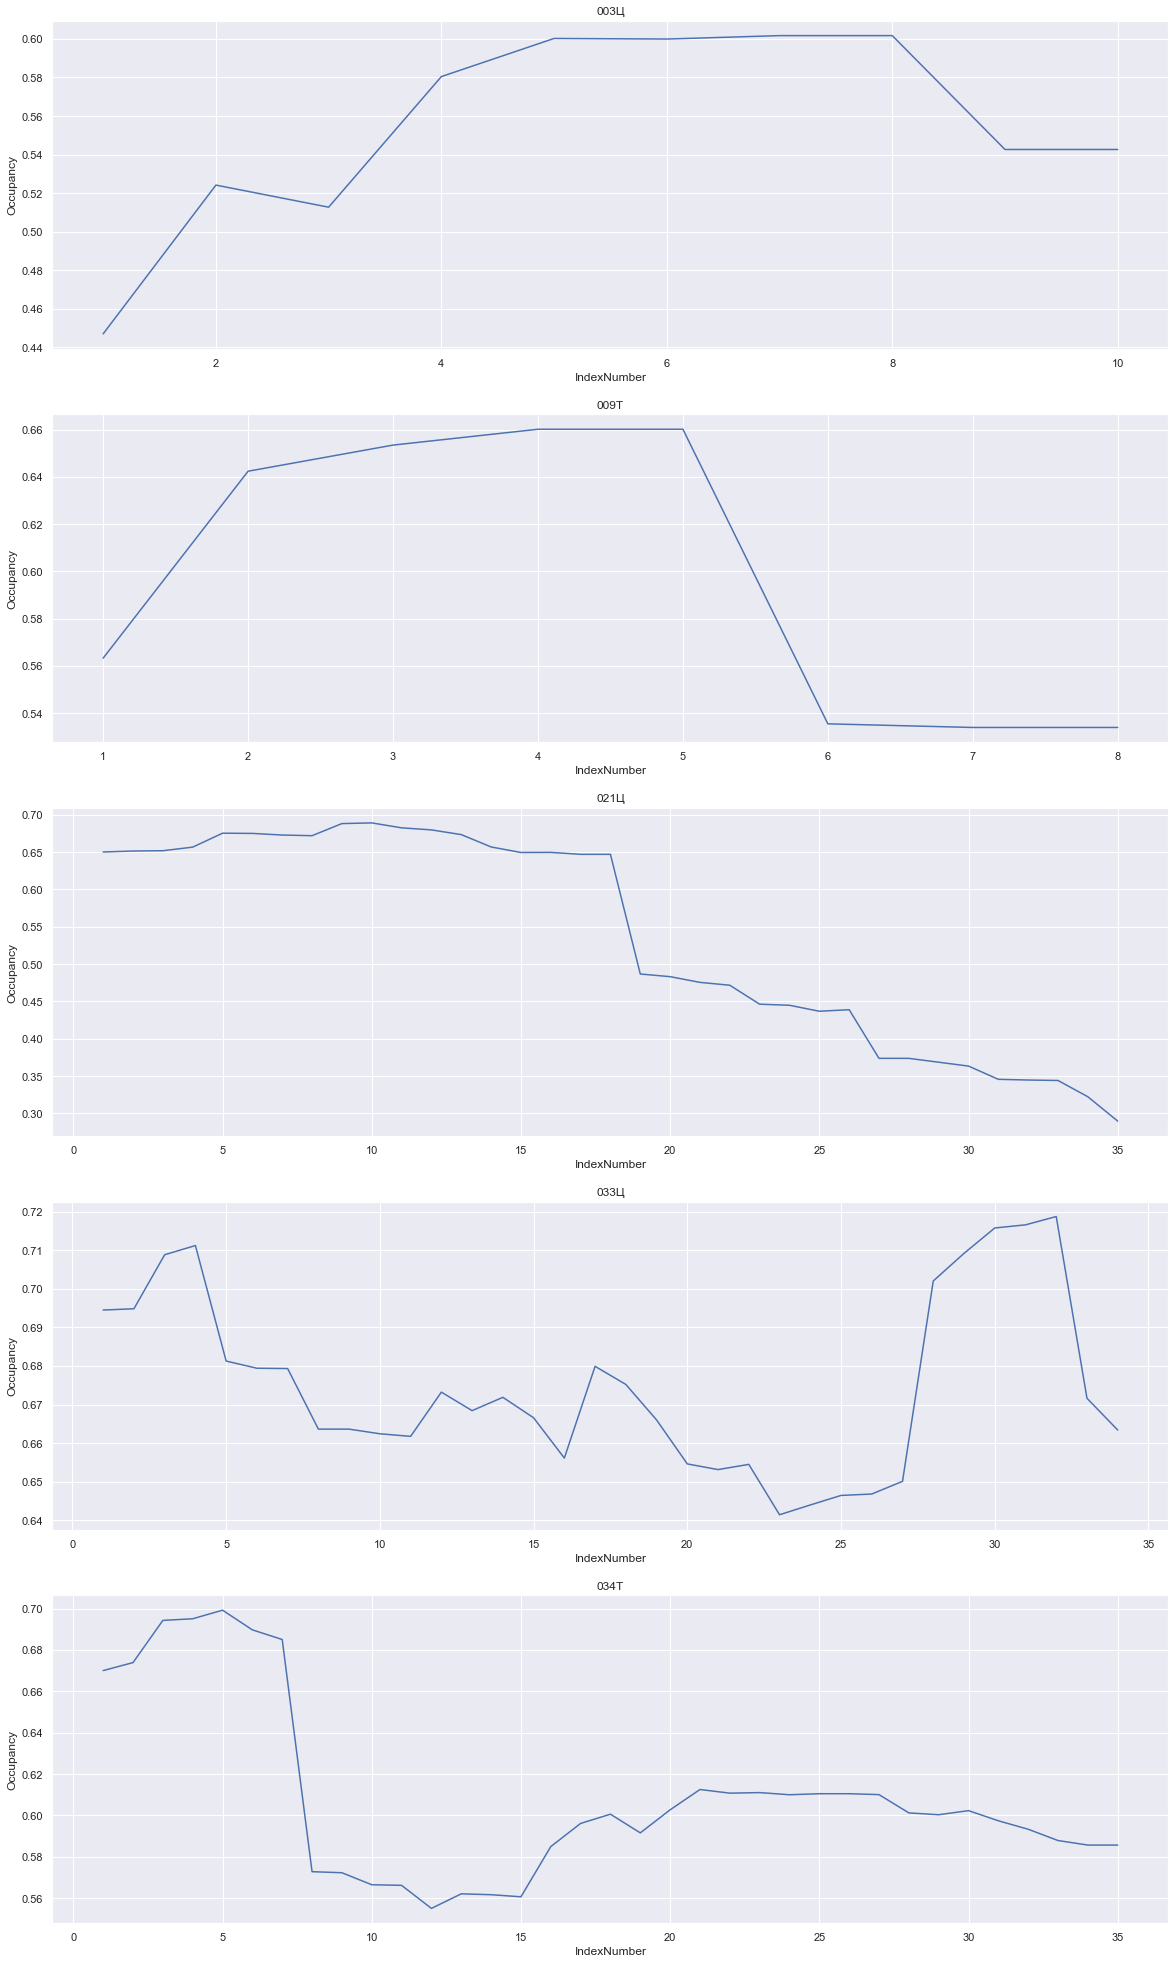

In [61]:
sns.set(style='darkgrid',)
fig, axes = plt.subplots(5, 1, figsize=(20,35))

for ax, train in enumerate(OccupancyByDay.TrainNumber.unique()):
    print(train)
    g = sns.lineplot(x=OccupancyByIndex.IndexNumber, y=OccupancyByIndex[OccupancyByIndex.TrainNumber == train].Occupancy, dashes = False, 
                 ax=axes[ax]).set_title(train)
    
#The trend of changing the occupancy of the train depending on the movement of the stations

# Data Preprocessing

In [227]:
def prepocess_data(df, train):
    df = df[df.TrainNumber == train]
    
    features_list = ['IndexNumber', 'CarClass', 'WagonNumber']
    target = 'Occupancy'  

    df = df.sort_values("DepartureDate")
    
    X = df[features_list]
    y = df[target]
    
    X = pd.get_dummies(X)
    
    X_train = X.iloc[:int(df.shape[0]*0.8)]
    y_train = y.iloc[:int(df.shape[0]*0.8)]
    
    X_test = X.iloc[int(df.shape[0]*0.8):]
    y_test = y.iloc[int(df.shape[0]*0.8):]
    
    return X_train, X_test, y_train, y_test

In [228]:
X_train, X_test, y_train, y_test = prepocess_data(Actual_df, '021Ц')

In [135]:
window = 60
num_shape = X_train.shape[0]

In [127]:
Actual_df[Actual_df.TrainNumber == '021Ц'].shape

(159600, 17)

In [133]:
X_train.shape

(127680, 5)

In [207]:
X_train1 = []
y_train1 = []

for i in range(0, num_shape, window):
    X_train_ = X_train[i:i+window].to_numpy()
    X_train1.append(X_train_)
    
    y_train_ = y_train[i:i+window]
    y_train1.append(y_train_)

In [217]:
X_train = np.stack(X_train1)

In [218]:
y_train = np.stack(y_train1)

In [219]:
X_train

array([[[ 1,  6,  0,  1,  0],
        [ 1,  1,  1,  0,  0],
        [ 2,  1,  1,  0,  0],
        ...,
        [ 9,  8,  0,  0,  1],
        [10,  8,  0,  0,  1],
        [ 3,  8,  0,  0,  1]],

       [[11,  8,  0,  0,  1],
        [13,  9,  0,  0,  1],
        [14,  9,  0,  0,  1],
        ...,
        [33, 11,  0,  0,  1],
        [34, 11,  0,  0,  1],
        [28, 11,  0,  0,  1]],

       [[27, 11,  0,  0,  1],
        [19, 11,  0,  0,  1],
        [17, 11,  0,  0,  1],
        ...,
        [21,  9,  0,  1,  0],
        [23,  9,  0,  1,  0],
        [24,  9,  0,  1,  0]],

       ...,

       [[ 3,  1,  1,  0,  0],
        [ 4,  2,  1,  0,  0],
        [ 5,  2,  1,  0,  0],
        ...,
        [35,  8,  0,  1,  0],
        [17,  8,  0,  0,  1],
        [ 1,  8,  0,  0,  1]],

       [[ 2,  8,  0,  0,  1],
        [ 3,  8,  0,  0,  1],
        [ 4,  8,  0,  0,  1],
        ...,
        [ 8,  2,  1,  0,  0],
        [ 5,  9,  0,  0,  1],
        [ 6,  8,  0,  0,  1]],

       [[ 7,

# Regression
### Recurrent Neural Network
### Training of the basic LSTM model

In [70]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD

In [71]:
type(X_train[1][1][0])

numpy.intc

In [140]:
model = Sequential()
#LSTM layer (sigmoid activation function)  and Dropout regularization

model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 50)            11200     
                                                                 
 dropout_4 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_5 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_6 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_6 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_7 (LSTM)               (None, 50)               

In [141]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 300, batch_size = 32)

Epoch 1/300
67/67 [==============================] - 10s 76ms/step - loss: 0.0703
Epoch 2/300
67/67 [==============================] - 6s 88ms/step - loss: 0.0588
Epoch 3/300
67/67 [==============================] - 7s 110ms/step - loss: 0.0576
Epoch 4/300
67/67 [==============================] - 7s 108ms/step - loss: 0.0571
Epoch 5/300
67/67 [==============================] - 7s 109ms/step - loss: 0.0561
Epoch 6/300
67/67 [==============================] - 8s 114ms/step - loss: 0.0559
Epoch 7/300
67/67 [==============================] - 8s 115ms/step - loss: 0.0551
Epoch 8/300
67/67 [==============================] - 8s 120ms/step - loss: 0.0557
Epoch 9/300
67/67 [==============================] - 8s 121ms/step - loss: 0.0547
Epoch 10/300
67/67 [==============================] - 8s 116ms/step - loss: 0.0550
Epoch 11/300
67/67 [==============================] - 8s 115ms/step - loss: 0.0554
Epoch 12/300
67/67 [==============================] - 8s 114ms/step - loss: 0.0549
Epoch 13/300
6

67/67 [==============================] - 7s 110ms/step - loss: 0.0484
Epoch 100/300
67/67 [==============================] - 8s 113ms/step - loss: 0.0478
Epoch 101/300
67/67 [==============================] - 8s 115ms/step - loss: 0.0474
Epoch 102/300
67/67 [==============================] - 8s 120ms/step - loss: 0.0470
Epoch 103/300
67/67 [==============================] - 7s 112ms/step - loss: 0.0474
Epoch 104/300
67/67 [==============================] - 8s 113ms/step - loss: 0.0472
Epoch 105/300
67/67 [==============================] - 7s 111ms/step - loss: 0.0469
Epoch 106/300
67/67 [==============================] - 8s 115ms/step - loss: 0.0469
Epoch 107/300
67/67 [==============================] - 8s 116ms/step - loss: 0.0467
Epoch 108/300
67/67 [==============================] - 8s 114ms/step - loss: 0.0466
Epoch 109/300
67/67 [==============================] - 7s 112ms/step - loss: 0.0468
Epoch 110/300
67/67 [==============================] - 8s 119ms/step - loss: 0.0465
Epoch 

67/67 [==============================] - 8s 117ms/step - loss: 0.0441
Epoch 197/300
67/67 [==============================] - 8s 116ms/step - loss: 0.0440
Epoch 198/300
67/67 [==============================] - 7s 111ms/step - loss: 0.0440
Epoch 199/300
67/67 [==============================] - 8s 113ms/step - loss: 0.0441
Epoch 200/300
67/67 [==============================] - 7s 112ms/step - loss: 0.0440
Epoch 201/300
67/67 [==============================] - 7s 112ms/step - loss: 0.0439
Epoch 202/300
67/67 [==============================] - 7s 111ms/step - loss: 0.0440
Epoch 203/300
67/67 [==============================] - 8s 114ms/step - loss: 0.0438
Epoch 204/300
67/67 [==============================] - 8s 118ms/step - loss: 0.0440
Epoch 205/300
67/67 [==============================] - 8s 120ms/step - loss: 0.0439
Epoch 206/300
67/67 [==============================] - 8s 113ms/step - loss: 0.0441
Epoch 207/300
67/67 [==============================] - 7s 112ms/step - loss: 0.0441
Epoch 

67/67 [==============================] - 7s 111ms/step - loss: 0.0436
Epoch 294/300
67/67 [==============================] - 8s 113ms/step - loss: 0.0436
Epoch 295/300
67/67 [==============================] - 7s 112ms/step - loss: 0.0437
Epoch 296/300
67/67 [==============================] - 8s 121ms/step - loss: 0.0436
Epoch 297/300
67/67 [==============================] - 9s 134ms/step - loss: 0.0440
Epoch 298/300
67/67 [==============================] - 8s 124ms/step - loss: 0.0437
Epoch 299/300
67/67 [==============================] - 8s 119ms/step - loss: 0.0438
Epoch 300/300
67/67 [==============================] - 8s 112ms/step - loss: 0.0437


# Prediction

In [152]:
X_test1 = []
test_volume = X_test
for i in range(0, test_volume.shape[0], window):
    X_test_ = test_volume[i:i+window].to_numpy()


In [175]:
X_test1.shape

(532, 60, 5)

In [153]:
X_test1 = np.stack(X_test1)

In [154]:
predict = model.predict(X_test1)

In [168]:
model.evaluate(X_train, y_train, verbose=0)

0.04330864176154137

# Test Prediction

In [317]:
predicted_df = X_test.join(Actual_df['DepartureDate']).reset_index(drop=True)

In [318]:
predicted_df['Occupancy'] = 0

In [374]:
rowindex = 0
predict_index = 0
while rowindex < predicted_df.shape[0]:
    predicted_df.loc[rowindex:rowindex+window, 'Occupancy'] = float(predict[predict_index][0])
    predict_index += 1
    rowindex += 60

In [380]:
predicted_df = predicted_df[['DepartureDate','Occupancy']]

In [381]:
tain_df = Actual_df[Actual_df['TrainNumber'] == '021Ц'][['DepartureDate','Occupancy']]

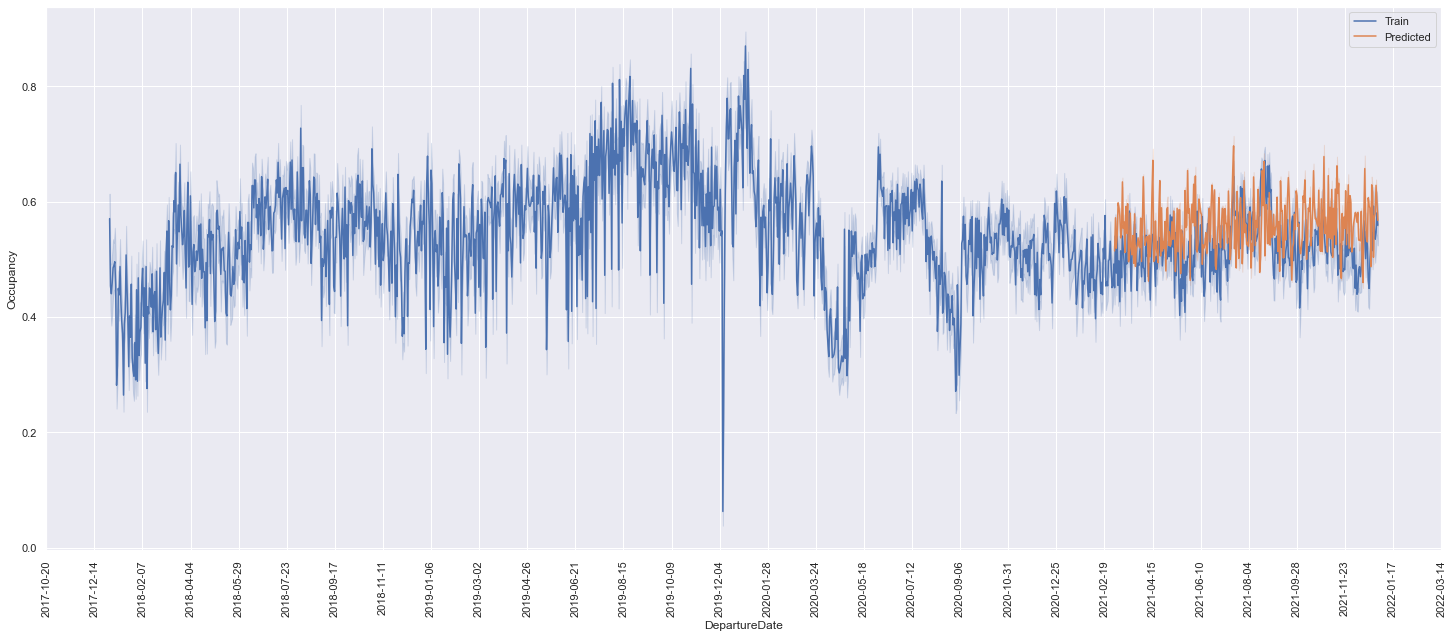

In [388]:
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)

s = sns.lineplot(x="DepartureDate", y="Occupancy",  data= tain_df, ax=ax, label="Train")
g = sns.lineplot(x="DepartureDate", y="Occupancy",  data= predicted_df, ax=ax, label='Predicted')

ticks = plt.xticks(rotation=90)

ax.xaxis.set_major_locator(LinearLocator(numticks=30))

plt.show()

# In general, the model predicts values in a 60-day window and catches some trend. However, there is still room for improvement and costly work.